In [1]:
import matplotlib.pyplot as plt # pyplot
import matplotlib as mpl # matplotlib
%matplotlib inline
print(mpl.__version__)

import seaborn as sns # seaborn

import pandas as pd
import numpy as np
import pickle
import os, sys
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

pd.set_option('max_columns', 100)
mpl.rc('font', family='New Gulim') # 한글 설정
mpl.rc('axes', unicode_minus=False) # 음수 부호 깨지는거 설정
os.chdir('C:/Users/goeunseong/Desktop/Python/개인 프로젝트/피파온라인4 데이터 분석/')
print(os.getcwd())

# 통계 검정 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scikit_posthocs as sp
import pingouin as pg
import scikit_posthocs as sp
from statsmodels.stats.multicomp import MultiComparison

3.2.2
C:\Users\goeunseong\Desktop\Python\개인 프로젝트\피파온라인4 데이터 분석


In [2]:
with open('match_data.pkl', 'rb') as f:
    match_data = pickle.load(f)
    
match_data.shape

(200, 53)

In [3]:
match_data.info()
match_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   200 non-null    object 
 1   matchDate                 200 non-null    object 
 2   matchType                 200 non-null    int64  
 3   accessId                  200 non-null    object 
 4   nickname                  200 non-null    object 
 5   seasonId                  200 non-null    int64  
 6   matchResult               200 non-null    object 
 7   matchEndType              200 non-null    int64  
 8   systemPause               200 non-null    int64  
 9   foul                      200 non-null    int64  
 10  injury                    200 non-null    int64  
 11  redCards                  200 non-null    int64  
 12  yellowCards               200 non-null    int64  
 13  dribble                   200 non-null    int64  
 14  cornerKick

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
0,6463880b82e1730114777f16,2023-05-16T22:51:22,50,2e79630544e8b60b4e280106,낭만낭만낭만,202305,패,0,1,0,0,0,0,91,0,60,0,3.70556,keyboard,6,4,0,1,1,0,0,0,0,0,4,0,2,1,0,0,139,125,104,100,5,1,0,0,1,1,27,22,1,1,6,1,9,4
1,6463880b82e1730114777f16,2023-05-16T22:51:22,50,3cdf995d54068517228c31cd,챔피언스국대,202305,승,0,0,1,1,0,1,67,0,40,0,4.17222,keyboard,5,3,0,3,3,0,0,0,0,0,4,3,1,0,0,0,87,76,59,54,2,0,0,0,0,0,24,21,2,1,7,1,7,1
2,646239e2206717b7ae7ac23d,2023-05-15T23:07:10,50,3cdf995d54068517228c31cd,챔피언스국대,202305,패,0,0,4,0,0,0,60,1,43,1,3.78333,keyboard,2,2,0,1,1,0,0,0,0,0,2,1,0,0,0,0,94,83,69,64,5,3,1,1,1,1,17,14,1,0,20,2,15,8
3,646239e2206717b7ae7ac23d,2023-05-15T23:07:10,50,e7442b8debde3fbc6b39befe,텐하흐샴푸뭐쓰냐,202305,승,0,0,0,0,0,0,98,4,57,1,4.58889,keyboard,12,9,0,3,3,0,2,0,0,0,6,2,6,1,0,0,136,124,107,102,10,4,0,0,0,0,17,16,2,2,3,1,9,7
4,6460dbfd9fbc18bd9c7b47b9,2023-05-14T22:13:28,50,3cdf995d54068517228c31cd,챔피언스국대,202305,승,0,0,1,0,0,1,61,1,49,1,4.65000,keyboard,6,6,0,4,4,0,0,0,0,0,2,2,3,2,0,0,84,76,59,55,2,0,0,0,1,1,21,19,1,1,7,1,11,6


In [4]:
match_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
matchType,200.0,50.000000,0.000000,50.0,50.00000,50.000000,50.000000,50.00000
seasonId,200.0,202304.210000,0.408330,202304.0,202304.00000,202304.000000,202304.000000,202305.00000
matchEndType,200.0,0.225000,0.570968,0.0,0.00000,0.000000,0.000000,2.00000
systemPause,200.0,0.155000,0.414529,0.0,0.00000,0.000000,0.000000,3.00000
foul,200.0,0.765000,0.918692,0.0,0.00000,1.000000,1.000000,4.00000
injury,200.0,0.130000,0.365744,0.0,0.00000,0.000000,0.000000,2.00000
redCards,200.0,0.010000,0.099748,0.0,0.00000,0.000000,0.000000,1.00000
yellowCards,200.0,0.135000,0.356948,0.0,0.00000,0.000000,0.000000,2.00000
dribble,200.0,71.510000,22.567596,0.0,65.00000,73.000000,85.000000,111.00000
cornerKick,200.0,1.585000,1.404506,0.0,1.00000,1.000000,2.000000,7.00000


In [5]:
match_data['matchResult'].value_counts()

패    82
승    82
무    36
Name: matchResult, dtype: int64

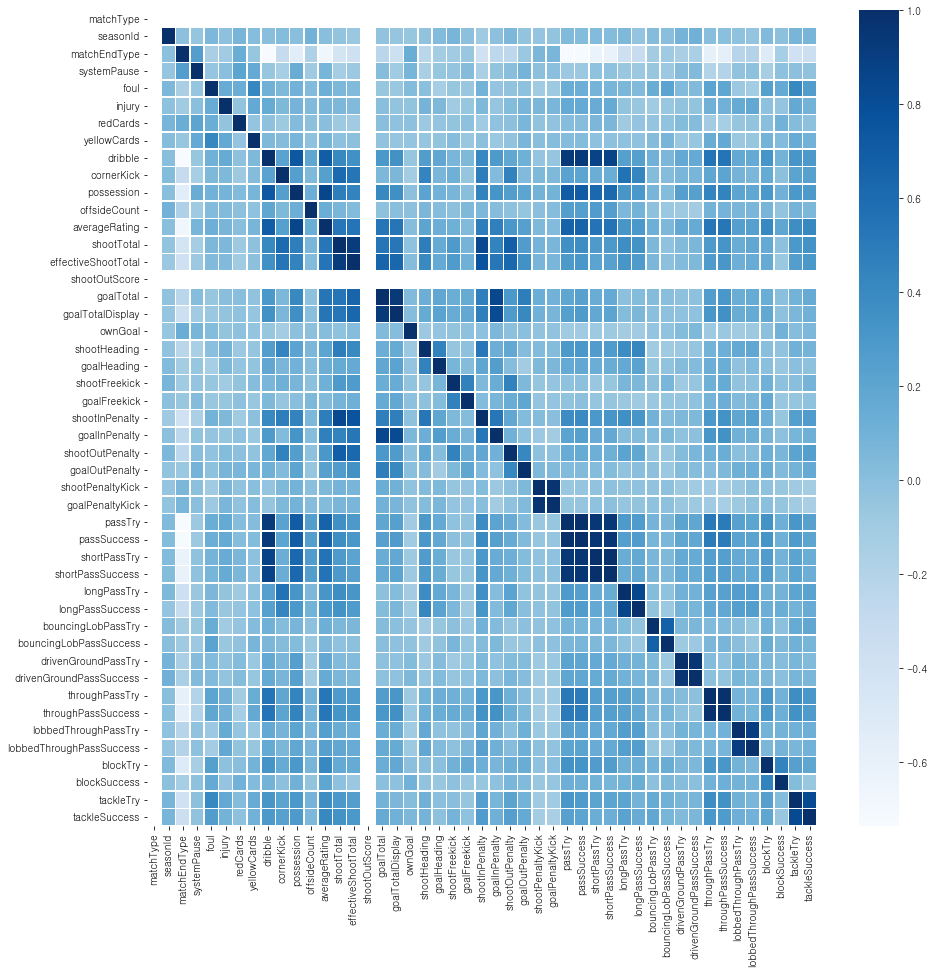

In [6]:
# 전체 변수에 대한 상관계수 확인
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(match_data.corr(), annot = False, linewidths=.5, cmap='Blues')
plt.show()

In [7]:
my_match = match_data.loc[match_data['nickname'] == '챔피언스국대']
print('내 경기 지표 : ', my_match.shape)

내 경기 지표 :  (100, 53)


In [8]:
win_match = my_match.loc[(my_match['matchResult'] == '승') & (my_match['nickname'] == '챔피언스국대')].reset_index(drop=True)
lose_match = my_match.loc[(my_match['matchResult'] == '패') & (my_match['nickname'] == '챔피언스국대')].reset_index(drop=True)
draw_match = my_match.loc[(my_match['matchResult'] == '무') & (my_match['nickname'] == '챔피언스국대')].reset_index(drop=True)

print('승리했을 때의 데이터 형태 : ', win_match.shape)
print('패배했을 때의 데이터 형태 : ', lose_match.shape)
print('비겼을 때의 데이터 형태 : ', draw_match.shape)

승리했을 때의 데이터 형태 :  (48, 53)
패배했을 때의 데이터 형태 :  (34, 53)
비겼을 때의 데이터 형태 :  (18, 53)


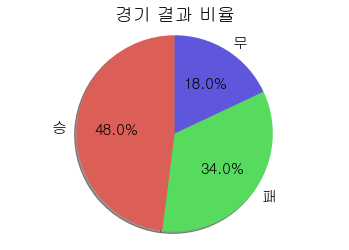

In [9]:
labels = ['승', '패', '무']
sizes = [2*round(len(win_match)/len(my_match), 3), 2*round(len(lose_match)/len(my_match), 3),
        2*round(len(draw_match)/len(my_match), 3)]
explode = (0, 0, 0)

colors = sns.color_palette('hls',len(labels))
plt.rc('font', size=15)
plt.rc('figure', titlesize=20) # figure title 폰트 크기

title = '경기 결과 비율'
fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90, colors=colors)
ax.axis('equal')
ax.set_title(title)
plt.savefig(f'{title}.png')
plt.show()

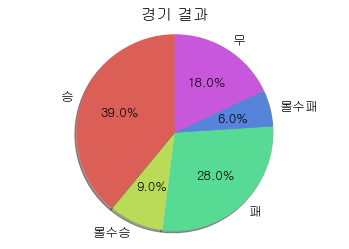

In [10]:
labels = ['승', '몰수승', '패', '몰수패', '무']
sizes = [round(len(win_match.loc[win_match['matchEndType'] == 0])/len(my_match), 3),
         round(len(win_match.loc[win_match['matchEndType'] == 1])/len(my_match), 3),
         round(len(lose_match.loc[lose_match['matchEndType'] == 0])/len(my_match), 3),
         round(len(lose_match.loc[lose_match['matchEndType'] == 2])/len(my_match), 3),
         round(len(draw_match.loc[draw_match['matchEndType'] == 0])/len(my_match), 3)]

explode = (0, 0, 0, 0, 0)
colors = sns.color_palette('hls',len(labels))
plt.rc('figure', titlesize=30) # figure title 폰트 크기
plt.rc('font', size=13)

title = '경기 결과'
fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90, colors=colors)
ax.axis('equal')
ax.set_title(title)
plt.savefig(f'{title}.png')
plt.show()

In [11]:
print('변수 추가 이전 데이터 형태 : ', my_match.shape)
my_match['Date'] = [my_match['matchDate'].str.split('T')[i][0] for i in my_match['matchDate'].index]
my_match['Time'] = [my_match['matchDate'].str.split('T')[i][1] for i in my_match['matchDate'].index]

my_match['Date'] = pd.to_datetime(my_match['Date'])
my_match['Year'] = my_match['Date'].dt.year
my_match['Month'] = my_match['Date'].dt.month
my_match['Day'] = my_match['Date'].dt.day
my_match['weekday'] = my_match['Date'].dt.weekday

my_match['Hour'] = my_match['Time'].str[0:2]
my_match['Minute'] = my_match['Time'].str[3:5]
my_match['Second'] = my_match['Time'].str[6:]
print('변수 추가 이후 데이터 형태 : ', my_match.shape)

변수 추가 이전 데이터 형태 :  (100, 53)
변수 추가 이후 데이터 형태 :  (100, 62)


In [12]:
my_match.head()

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second
1,6463880b82e1730114777f16,2023-05-16T22:51:22,50,3cdf995d54068517228c31cd,챔피언스국대,202305,승,0,0,1,1,0,1,67,0,40,0,4.17222,keyboard,5,3,0,3,3,0,0,0,0,0,4,3,1,0,0,0,87,76,59,54,2,0,0,0,0,0,24,21,2,1,7,1,7,1,2023-05-16,22:51:22,2023,5,16,1,22,51,22
2,646239e2206717b7ae7ac23d,2023-05-15T23:07:10,50,3cdf995d54068517228c31cd,챔피언스국대,202305,패,0,0,4,0,0,0,60,1,43,1,3.78333,keyboard,2,2,0,1,1,0,0,0,0,0,2,1,0,0,0,0,94,83,69,64,5,3,1,1,1,1,17,14,1,0,20,2,15,8,2023-05-15,23:07:10,2023,5,15,0,23,07,10
4,6460dbfd9fbc18bd9c7b47b9,2023-05-14T22:13:28,50,3cdf995d54068517228c31cd,챔피언스국대,202305,승,0,0,1,0,0,1,61,1,49,1,4.65000,keyboard,6,6,0,4,4,0,0,0,0,0,2,2,3,2,0,0,84,76,59,55,2,0,0,0,1,1,21,19,1,1,7,1,11,6,2023-05-14,22:13:28,2023,5,14,6,22,13,28
7,645fa8eba5540d06b82cee79,2023-05-14T00:23:31,50,3cdf995d54068517228c31cd,챔피언스국대,202305,패,0,0,0,0,0,0,67,2,46,1,3.96111,keyboard,7,5,0,2,2,0,0,0,0,0,5,2,2,0,0,0,96,86,72,69,3,2,2,0,0,0,18,14,1,1,7,0,15,6,2023-05-14,00:23:31,2023,5,14,6,00,23,31
8,645fa619b2d22df08adb9637,2023-05-14T00:12:21,50,3cdf995d54068517228c31cd,챔피언스국대,202305,무,0,0,1,0,0,1,73,2,47,3,4.18889,keyboard,9,6,0,4,4,0,1,1,0,0,3,3,4,1,0,0,102,96,70,66,5,4,0,0,0,0,27,26,0,0,8,1,17,10,2023-05-14,00:12:21,2023,5,14,6,00,12,21


In [13]:
my_match['seasonId'].value_counts()

202304    79
202305    21
Name: seasonId, dtype: int64

In [14]:
my_match.sort_index(ascending=False).reset_index(drop=True, inplace=True)

In [15]:
season_result_list = list(zip(my_match['seasonId'], my_match['matchResult']))
season_result_list[:5]

[(202305, '승'), (202305, '패'), (202305, '승'), (202305, '패'), (202305, '무')]

In [16]:
list_2304 = list()
list_2305 = list()

for idx, result in enumerate(season_result_list):
    if (result[0] == 202304) & (result[1] == '승'):
        list_2304.append(1)
    elif ((result[0] == 202304) & (result[1] == '무')) or ((result[0] == 202304) & (result[1] == '패')):
        list_2304.append(0)
    elif (result[0] == 202305) & (result[1] == '승'):
        list_2305.append(1)
    elif ((result[0] == 202305) & (result[1] == '무')) or ((result[0] == 202305) & (result[1] == '패')):
        list_2305.append(0)
        
print('Season 202304 : ', len(list_2304))
print('Season 202305 : ',len(list_2305))

Season 202304 :  79
Season 202305 :  21


In [17]:
# 202014 시즌

score_2304 = 0
rate_2304 = list()

score_2305 = 0
rate_2305 = list()

for idx, value in enumerate(list_2304):
    if value == 1:
        score_2304 += 1
    elif value == 0:
        score_2304 += 0
    rate_2304.append(score_2304 / (idx+1)*100)
    
for idx, value in enumerate(list_2305):
    if value == 1:
        score_2305 += 1
    elif value == 0:
        score_2305 += 0
    rate_2305.append(score_2305 / (idx+1)*100)    

print('Season 04 Winning Rate length : ', len(rate_2304))
print('Season 05 Winning Rate length : ', len(rate_2305))

Season 04 Winning Rate length :  79
Season 05 Winning Rate length :  21


In [18]:
rate = rate_2304 + rate_2305
my_match['rate'] = rate

my_match.head()

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,rate
1,6463880b82e1730114777f16,2023-05-16T22:51:22,50,3cdf995d54068517228c31cd,챔피언스국대,202305,승,0,0,1,1,0,1,67,0,40,0,4.17222,keyboard,5,3,0,3,3,0,0,0,0,0,4,3,1,0,0,0,87,76,59,54,2,0,0,0,0,0,24,21,2,1,7,1,7,1,2023-05-16,22:51:22,2023,5,16,1,22,51,22,0.000000
2,646239e2206717b7ae7ac23d,2023-05-15T23:07:10,50,3cdf995d54068517228c31cd,챔피언스국대,202305,패,0,0,4,0,0,0,60,1,43,1,3.78333,keyboard,2,2,0,1,1,0,0,0,0,0,2,1,0,0,0,0,94,83,69,64,5,3,1,1,1,1,17,14,1,0,20,2,15,8,2023-05-15,23:07:10,2023,5,15,0,23,07,10,0.000000
4,6460dbfd9fbc18bd9c7b47b9,2023-05-14T22:13:28,50,3cdf995d54068517228c31cd,챔피언스국대,202305,승,0,0,1,0,0,1,61,1,49,1,4.65000,keyboard,6,6,0,4,4,0,0,0,0,0,2,2,3,2,0,0,84,76,59,55,2,0,0,0,1,1,21,19,1,1,7,1,11,6,2023-05-14,22:13:28,2023,5,14,6,22,13,28,33.333333
7,645fa8eba5540d06b82cee79,2023-05-14T00:23:31,50,3cdf995d54068517228c31cd,챔피언스국대,202305,패,0,0,0,0,0,0,67,2,46,1,3.96111,keyboard,7,5,0,2,2,0,0,0,0,0,5,2,2,0,0,0,96,86,72,69,3,2,2,0,0,0,18,14,1,1,7,0,15,6,2023-05-14,00:23:31,2023,5,14,6,00,23,31,25.000000
8,645fa619b2d22df08adb9637,2023-05-14T00:12:21,50,3cdf995d54068517228c31cd,챔피언스국대,202305,무,0,0,1,0,0,1,73,2,47,3,4.18889,keyboard,9,6,0,4,4,0,1,1,0,0,3,3,4,1,0,0,102,96,70,66,5,4,0,0,0,0,27,26,0,0,8,1,17,10,2023-05-14,00:12:21,2023,5,14,6,00,12,21,20.000000


In [19]:
group_data = pd.DataFrame(my_match.groupby(['Hour'], as_index=False)['rate'].mean()).reset_index(drop = True)
group_data # 시간별 평균 승률 그래프

,Hour,rate
0,00,36.233168
1,01,38.799400
2,02,42.857143
3,10,51.650611
4,11,41.139502
5,12,39.449539
6,13,40.178571
7,16,42.784343
8,17,43.412132
9,18,36.666667


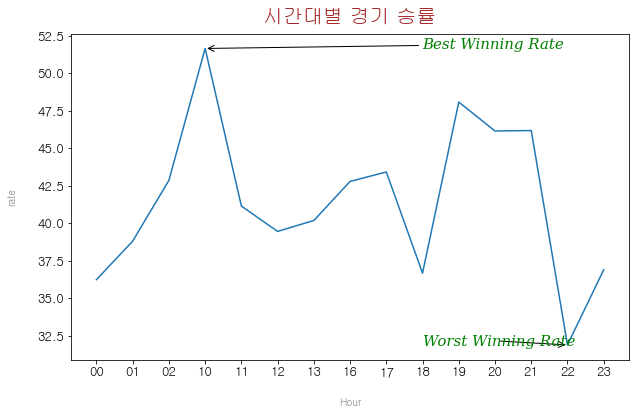

In [20]:
font_label = {
    'color' : 'gray',
    'weight' : 'bold',
    'size' : 10
}

font_title = {
    'size' : 20,
    'color' : 'brown',
    'weight' : 'bold',
    'va' : 'baseline',
    'ha' : 'center'
}

font_text = {
    'size' : 10,
    'color' : 'blue',
    'weight' : 'bold',
    'horizontalalignment' : 'left',
    'verticalalignment' : 'center'
}

title = '시간대별 경기 승률'

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(group_data['Hour'], group_data['rate'])

ax.set_xlabel('Hour', fontdict = font_label, labelpad = 20)
ax.set_ylabel('rate', fontdict = font_label, labelpad = 20)
ax.set_title(title, fontdict = font_title, pad = 12)


# Add average
arrowprops = {
    'arrowstyle' : '->'
}
ax.annotate("Best Winning Rate", (3, group_data['rate'].max()), xytext=(9, group_data['rate'].max()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
           arrowprops=arrowprops)

ax.annotate("Worst Winning Rate", (13, group_data['rate'].min()), xytext=(9, group_data['rate'].min()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
           arrowprops=arrowprops)
plt.show()

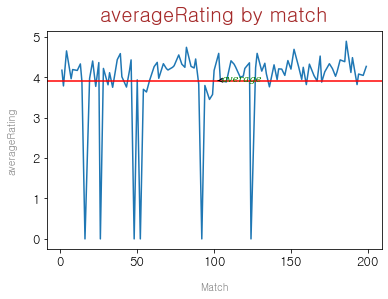

In [21]:
# 전체 경기 평점
title = 'averageRating by match'
fig, ax = plt.subplots()
ax.plot(my_match['averageRating'])
ax.axhline(my_match['averageRating'].mean(), color = 'red')
ax.set_xlabel('Match', fontdict=font_label, labelpad=15)
ax.set_ylabel('averageRating', fontdict=font_label, labelpad=15)
ax.set_title(title, fontdict=font_title, pad=10)
ax.annotate("average", (101, my_match['averageRating'].mean())
            , xytext=(105, my_match['averageRating'].mean()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=10,
           arrowprops=arrowprops)

plt.show()

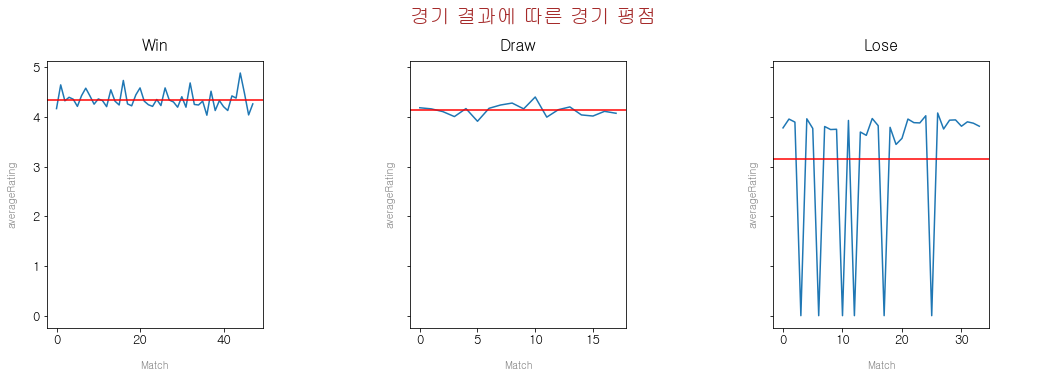

• 경기를 이겼을 때의 경기 평점은 거의 4점 이상을 기록했다.
• 경기를 비겼을 경우 3.8 ~ 4.2 사이의 경기 평점을 보이고 있으며 편차가 크지 않다.
• 경기를 졌을 경우, 몇몇 경기에서 평점이 1점대를 기록하고 있으며 경기 포기, 몰수패 등을 예상해볼 수 있다.


In [22]:
suptitle = '경기 결과에 따른 경기 평점'
title_list = ['Win', 'Draw', 'Lose']
data_list = [win_match, draw_match, lose_match]

fig, ax = plt.subplots(1,3,figsize=(15,5), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].plot(data['averageRating'])
    ax[idx].axhline(data['averageRating'].mean(), color = 'red')
    ax[idx].set_xlabel('Match', fontdict=font_label, labelpad=15)
    ax[idx].set_ylabel('averageRating', fontdict=font_label, labelpad=15)
    ax[idx].set_title(title_list[idx], pad=10)
    ax[idx].annotate("average", (len(data)+3, data['averageRating'].mean())
                , xytext=(len(data)+5, data['averageRating'].mean()), 
               color='green', fontfamily='serif', fontstyle='italic', fontsize=10,
               arrowprops=arrowprops)

plt.suptitle(suptitle, fontdict=font_title, y=1.05, fontsize=20)
fig.tight_layout()
plt.show()
print('• 경기를 이겼을 때의 경기 평점은 거의 4점 이상을 기록했다.')
print('• 경기를 비겼을 경우 3.8 ~ 4.2 사이의 경기 평점을 보이고 있으며 편차가 크지 않다.')
print('• 경기를 졌을 경우, 몇몇 경기에서 평점이 1점대를 기록하고 있으며 경기 포기, 몰수패 등을 예상해볼 수 있다.')

In [23]:
columns_list = match_data.columns.to_list()
print('ShootDTO 시작 column : ', columns_list.index('shootTotal'))
print('ShootDTO 끝 column : ', columns_list.index('goalPenaltyKick'))
shoot_columns = columns_list[19:35]
shoot_columns

ShootDTO 시작 column :  19
ShootDTO 끝 column :  34


['shootTotal',
 'effectiveShootTotal',
 'shootOutScore',
 'goalTotal',
 'goalTotalDisplay',
 'ownGoal',
 'shootHeading',
 'goalHeading',
 'shootFreekick',
 'goalFreekick',
 'shootInPenalty',
 'goalInPenalty',
 'shootOutPenalty',
 'goalOutPenalty',
 'shootPenaltyKick',
 'goalPenaltyKick']

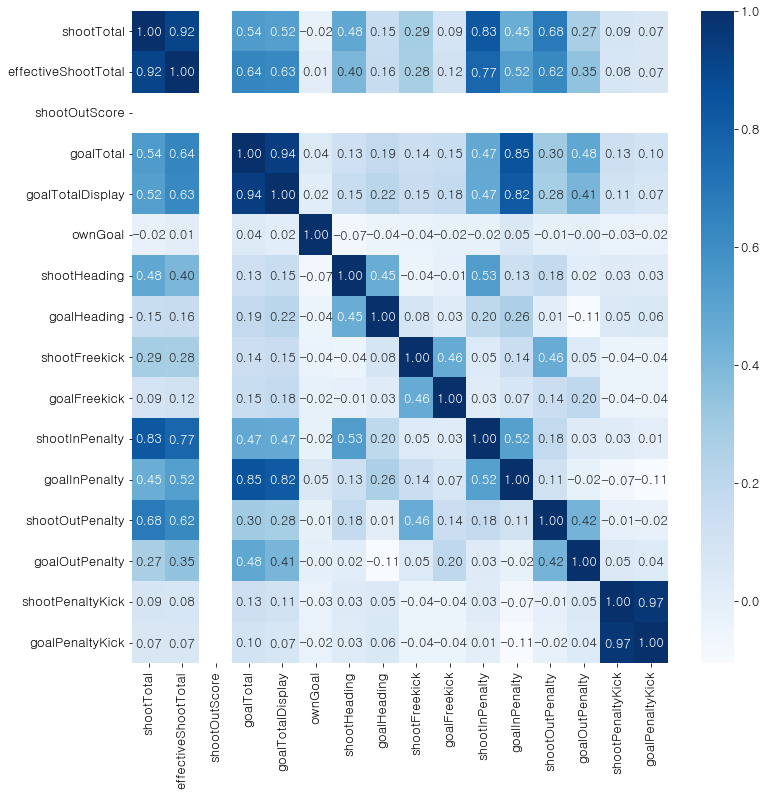

In [24]:
# 슛 변수 간의 상관관계 확인
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(match_data[shoot_columns].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [25]:
shoot_kind = ['Heading', 'Freekick', 'InPenalty', 'OutPenalty', 'PenaltyKick']

# 상대방 기준 매치 데이터
not_me = match_data.loc[match_data['nickname']!='챔피언스국대']
print('상대방 데이터 : ',not_me.shape)

상대방 데이터 :  (100, 53)


In [112]:
# 슛 유형별 득점 성공 비율
for kind in shoot_kind:
    match_data[f'goal{kind}_rate'] = round(match_data[f'goal{kind}'] / match_data[f'shoot{kind}'], 2)
    my_match[f'goal{kind}_rate'] = round(my_match[f'goal{kind}'] / my_match[f'shoot{kind}'], 2)
    not_me[f'goal{kind}_rate'] = round(not_me[f'goal{kind}'] / not_me[f'shoot{kind}'], 2)

# 전체 골 대비 득점 유형별 비율
for kind in shoot_kind:
    match_data[f'total_goal{kind}_rate'] = round(match_data[f'goal{kind}'] / match_data[f'goalTotal'], 2)
    my_match[f'total_goal{kind}_rate'] = round(my_match[f'goal{kind}'] / my_match[f'goalTotal'], 2)
    not_me[f'total_goal{kind}_rate'] = round(not_me[f'goal{kind}'] / not_me[f'goalTotal'], 2)    

In [113]:
# 싱글골 비율
match_data['goal_own_rate'] = round(match_data['ownGoal'] / match_data['goalTotal'])

In [114]:
print('매치 데이터 득점 통계치 :')
display(match_data[match_data.columns[match_data.columns.str.contains('rate')]].describe())

print('나의 경기 득점 통계치 :')
display(my_match[my_match.columns[my_match.columns.str.contains('rate')]].describe())

매치 데이터 득점 통계치 :


,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate,goal_own_rate
count,93.000000,25.000000,189.000000,155.000000,13.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.227849,0.180000,0.471587,0.248774,0.923077,0.057389,0.008056,0.770944,0.199667,0.029333,0.005556
std,0.376462,0.378594,0.368315,0.305685,0.277350,0.137720,0.051013,0.294654,0.279678,0.122395,0.074536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.400000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,0.670000,0.500000,1.000000,0.000000,0.000000,1.000000,0.330000,0.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000


나의 경기 득점 통계치 :


,rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
count,100.000000,40.000000,20.000000,94.000000,84.000000,9.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,39.889757,0.133250,0.200000,0.473085,0.273690,0.888889,0.028000,0.013333,0.733444,0.222667,0.043889
std,12.195464,0.295204,0.410391,0.340139,0.326093,0.333333,0.093619,0.066956,0.299202,0.279091,0.156476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.201299,0.000000,0.000000,0.212500,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000
50%,41.486424,0.000000,0.000000,0.465000,0.160000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
75%,46.062271,0.000000,0.000000,0.670000,0.500000,1.000000,0.000000,0.000000,1.000000,0.382500,0.000000
max,100.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000


In [115]:
# 결측값 채우기
na_columns = list(match_data.columns[match_data.columns.str.contains('total_goal')])
print(na_columns)
print('결측값 대체 이전 : \n', match_data.isna().sum())

for col in na_columns:
    match_data[col] = match_data[col].fillna(0)

print('-'*40)
print('결측값 대체 이후 : \n', match_data.isna().sum())


['total_goalHeading_rate', 'total_goalFreekick_rate', 'total_goalInPenalty_rate', 'total_goalOutPenalty_rate', 'total_goalPenaltyKick_rate']
결측값 대체 이전 : 
 matchId                        0
matchDate                      0
matchType                      0
accessId                       0
nickname                       0
                              ..
total_goalFreekick_rate       20
total_goalInPenalty_rate      20
total_goalOutPenalty_rate     20
total_goalPenaltyKick_rate    20
goal_own_rate                 20
Length: 64, dtype: int64
----------------------------------------
결측값 대체 이후 : 
 matchId                        0
matchDate                      0
matchType                      0
accessId                       0
nickname                       0
                              ..
total_goalFreekick_rate        0
total_goalInPenalty_rate       0
total_goalOutPenalty_rate      0
total_goalPenaltyKick_rate     0
goal_own_rate                 20
Length: 64, dtype: int64


In [106]:
# goalHeading_rate 값의 inf 데이터 확인
match_data.loc[match_data['goalHeading_rate']==np.inf]

display(match_data.iloc[126:128])
print('goalHeading 값은 1인데 shootHeading 값이 0이라서 inf 값이 나온다.')
print('슛 횟수가 0인데 골이 1로 카운팅 되는 이슈로, 슛 횟수를 1로 변경 처리')

match_data.loc[126, 'shootHeading'] = 1

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate,goal_own_rate
126,644342f60616db0cbee09b45,2023-04-22T11:24:43,50,7926d870643b04313dee0232,비켜라비켜v,202304,패,0,0,2,0,0,0,77,0,44,1,3.96667,keyboard,4,4,0,2,2,0,1,1,0,0,3,2,0,0,0,0,110,94,86,80,3,1,0,0,0,0,20,13,0,0,9,0,15,7,inf,NaN,0.67,NaN,NaN,0.5,0.0,1.0,0.0,0.0,0.0
127,644342f60616db0cbee09b45,2023-04-22T11:24:43,50,3cdf995d54068517228c31cd,챔피언스국대,202304,승,0,0,0,0,0,0,92,0,56,2,4.23333,keyboard,6,5,0,3,3,0,1,0,0,0,1,3,1,0,0,0,120,109,86,81,1,1,1,0,1,1,29,25,1,1,9,0,9,6,NaN,NaN,1.00,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0


goalHeading 값은 1인데 shootHeading 값이 0이라서 inf 값이 나온다.
슛 횟수가 0인데 골이 1로 카운팅 되는 이슈로, 슛 횟수를 1로 변경 처리


In [44]:
# goalInPenalty_rate 값의 inf 데이터 확인
match_data.loc[match_data['goalInPenalty_rate']==np.inf]

display(match_data.iloc[40:42])
print('goalInPenalty 값은 1인데 shootInPenalty 값이 0이라서 inf 값이 나온다.')
print('슛 횟수가 0인데 골이 1로 카운팅 되는 이슈로, 슛 횟수를 1로 변경 처리')

match_data.loc[41, 'shootInPenalty'] = 1

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate,goal_own_rate
40,645458a6b9312155f363e074,2023-05-05T10:25:50,50,3cdf995d54068517228c31cd,챔피언스국대,202305,무,0,0,0,0,0,0,84,2,53,0,4.01111,keyboard,8,5,0,2,2,0,0,0,1,0,4,1,4,1,0,0,116,103,89,81,4,2,0,0,2,2,20,18,0,0,10,1,14,9,NaN,0.0,0.25,0.25,NaN,0.0,0.0,0.5,0.5,0.0,0.0
41,645458a6b9312155f363e074,2023-05-05T10:25:50,50,96beb04920e286e3ebc541f4,LEGEND엠제이,202305,무,0,0,2,0,0,0,93,1,47,1,4.03333,keyboard,5,3,0,2,2,0,0,0,0,0,1,1,4,1,0,0,123,110,107,98,2,1,0,0,2,1,10,10,0,0,9,0,12,6,NaN,NaN,1.00,0.25,NaN,0.0,0.0,0.5,0.5,0.0,0.0


goalInPenalty 값은 1인데 shootInPenalty 값이 0이라서 inf 값이 나온다.
슛 횟수가 0인데 골이 1로 카운팅 되는 이슈로, 슛 횟수를 1로 변경 처리


In [64]:
frequency = [sizes[0][i] for i in range(len(sizes[0]))]
frequency

[0.05165,
 0.0072499999999999995,
 0.6938500000000001,
 0.17969999999999994,
 0.0264]

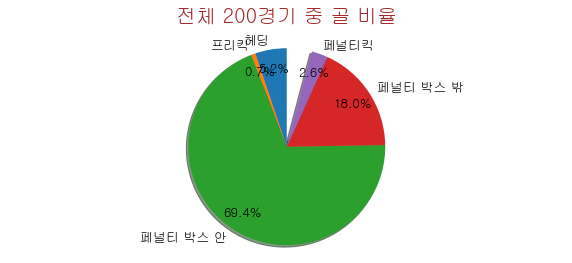

In [89]:
# 슛 종류별 골 비율
# 전체 200경기 중 전체 골 비율
labels = ['헤딩', '프리킥', '페널티 박스 안', '페널티 박스 밖', '페널티킥']
sizes = [match_data[match_data.columns[match_data.columns.str.contains('total_goal')]].mean()]
explode = (0,0,0,0,0)

title = '전체 200경기 중 골 비율'
fig, ax = plt.subplots(figsize=(10,4))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90, pctdistance=0.8)
ax.axis('equal')
ax.set_title(title, fontdict=font_title, y=1.05)
plt.show()

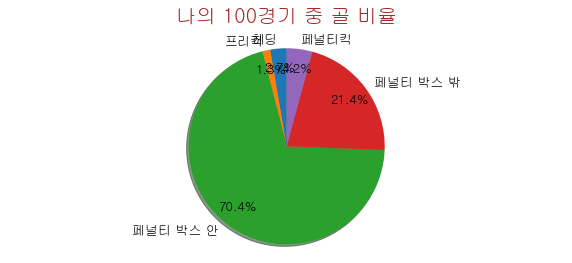

In [132]:
# 나의 100경기 중 전체 골 비율
labels = ['헤딩', '프리킥', '페널티 박스 안', '페널티 박스 밖', '페널티킥']
sizes = [my_match[my_match.columns[my_match.columns.str.contains('total_goal')]].mean()]
explode = (0,0,0,0,0)

title = '나의 100경기 중 골 비율'
fig, ax = plt.subplots(figsize=(10,4))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90, pctdistance=0.8)
ax.axis('equal')
ax.set_title(title, fontdict=font_title, y=1.05)
plt.show()

In [91]:
total_goal_rate_list = match_data.columns[match_data.columns.str.contains('total_goal')] # 전체 골 중 해당 골 비율
goal_rate_list = match_data.columns[match_data.columns.str.contains('rate')][:6] # 해당 슛 

In [145]:
data = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : match_data[goal_rate_list[:-1]].mean()}).reset_index(drop=True)
data

,shoot_kind,value
0,goalHeading_rate,0.227849
1,goalFreekick_rate,0.180000
2,goalInPenalty_rate,0.471587
3,goalOutPenalty_rate,0.248774
4,goalPenaltyKick_rate,0.923077


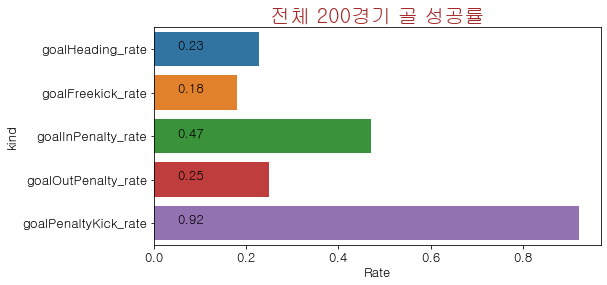

In [146]:
title = '전체 200경기 골 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.show()

In [147]:
data = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : my_match[goal_rate_list[:-1]].mean()}).reset_index(drop=True)
data

,shoot_kind,value
0,goalHeading_rate,0.133250
1,goalFreekick_rate,0.200000
2,goalInPenalty_rate,0.473085
3,goalOutPenalty_rate,0.273690
4,goalPenaltyKick_rate,0.888889


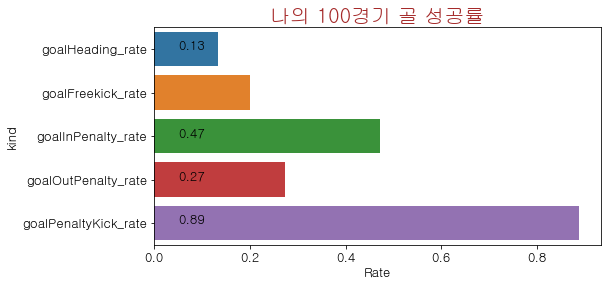

In [148]:
title = '나의 100경기 골 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    if idx == 1:
        continue
    ax.text(0.05, idx, round(value, 2))
    
plt.show()

In [149]:
my_shoot_rate = [my_match[my_match.columns[my_match.columns.str.contains('total_goal')]].mean()]
shoot_rate = [my_shoot_rate[0][i] for i in range(len(my_shoot_rate[0]))]

my_goal_rate = my_match[goal_rate_list[:-1]].mean()
my_goal_rate = [my_goal_rate[i] for i in range(len(my_goal_rate))]

goal_prob = [x*y for x,y in zip(shoot_rate, my_goal_rate)]
goal_prob

data = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : goal_prob}).reset_index(drop=True)
data

,shoot_kind,value
0,goalHeading_rate,0.003731
1,goalFreekick_rate,0.002667
2,goalInPenalty_rate,0.346982
3,goalOutPenalty_rate,0.060942
4,goalPenaltyKick_rate,0.039012


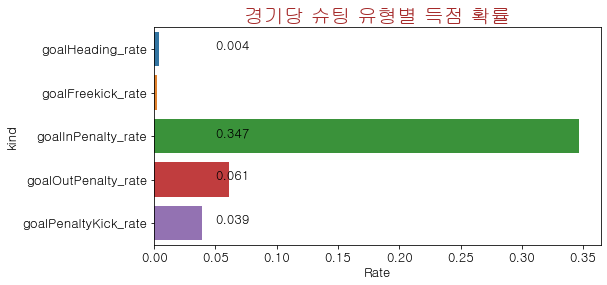

In [152]:
title = '경기당 슈팅 유형별 득점 확률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    if idx == 1:
        continue
    ax.text(0.05, idx, round(value, 3))
    
plt.show()

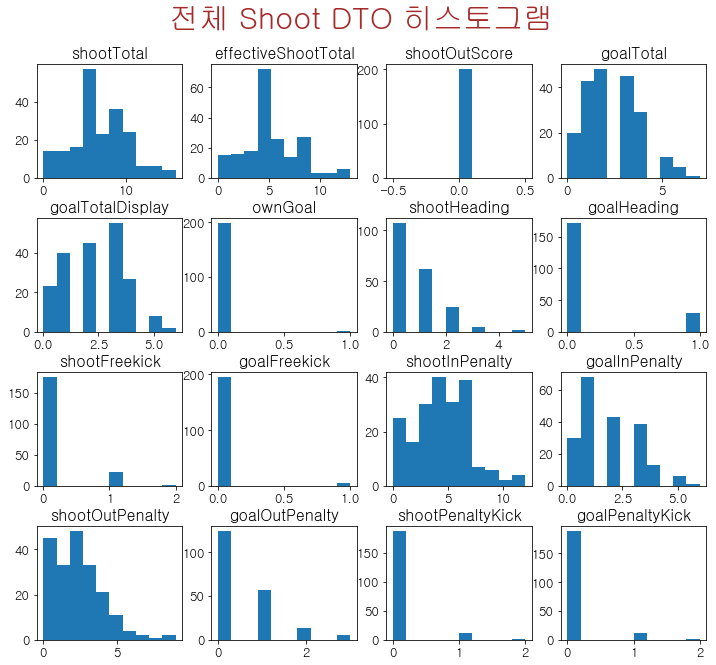

In [156]:
shoot_array = np.array(shoot_columns).reshape(4,-1)

suptitle = '전체 Shoot DTO 히스토그램'
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for i in range(0,4):
    for j,col in enumerate(shoot_array):
        ax[i,j].hist(match_data[shoot_array[i,j]].values)
        ax[i,j].set_title(shoot_array[i,j])
fig.suptitle(suptitle, fontdict=font_title)        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

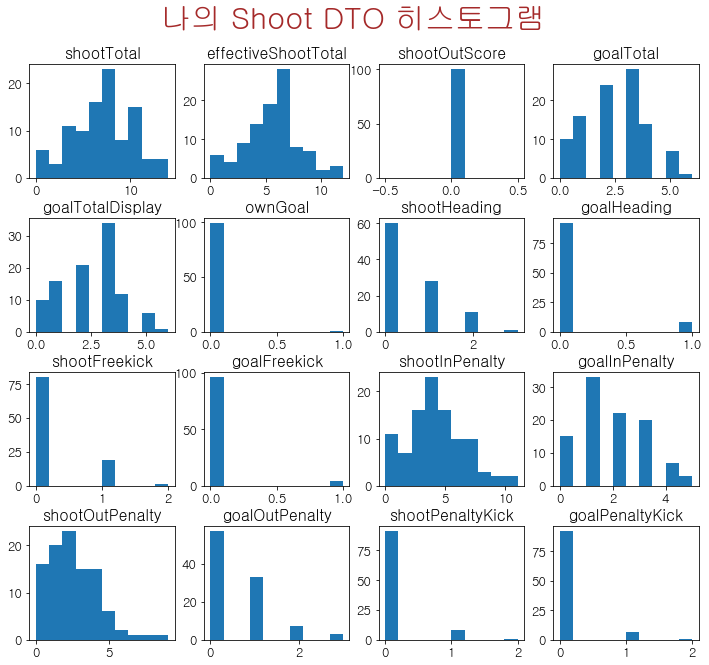

In [158]:
figtitle = '나의 Shoot DTO 히스토그램'
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for i in range(0,4):
    for j,col in enumerate(shoot_array):
        ax[i,j].hist(my_match[shoot_array[i,j]].values)
        ax[i,j].set_title(shoot_array[i,j])
fig.suptitle(figtitle, fontdict=font_title)        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()